In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('spam.csv')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4159,ham,i felt so...not any conveying reason.. Ese he....,NaN,NaN,NaN
2189,ham,Yup i shd haf ard 10 pages if i add figures......,NaN,NaN,NaN
159,spam,You are a winner U have been specially selecte...,NaN,NaN,NaN
567,ham,"So anyways, you can just go to your gym or wha...",NaN,NaN,NaN
3937,ham,WHEN THE FIRST STRIKE IS A RED ONE. THE BIRD +...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

## 1.Data cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.sample(5)

,v1,v2
3632,ham,Hui xin is in da lib.
5227,ham,I re-met alex nichols from middle school and i...
0,ham,"Go until jurong point, crazy.. Available only ..."
1672,spam,URGENT! We are trying to contact U. Todays dra...
668,ham,Have a good evening! Ttyl


In [8]:
# renamng the columns
df.rename(columns={'v1':'Prediction','v2':'Text'},inplace=True)
df.sample(5)

,Prediction,Text
123,ham,I am going to sao mu today. Will be done only ...
4788,ham,We're on the opposite side from where we dropp...
2582,spam,3 FREE TAROT TEXTS! Find out about your love l...
4851,ham,I liked your new house
1089,ham,Goodmorning today i am late for &lt;DECIMAL&g...


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [10]:
df['Prediction']=encoder.fit_transform(df['Prediction'])

In [11]:
df.head(5)

,Prediction,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
# missing values
df.isnull().sum()

Prediction    0
Text          0
dtype: int64

In [13]:
# check for duplicate values
df.duplicated().sum()

403

In [14]:
#remove duplicates
df=df.drop_duplicates(keep='first')

In [15]:
df.duplicated().sum()

0

In [16]:
df.shape

(5169, 2)





## EDA

In [17]:
df.head()

,Prediction,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
df['Prediction'].value_counts()

0    4516
1     653
Name: Prediction, dtype: int64

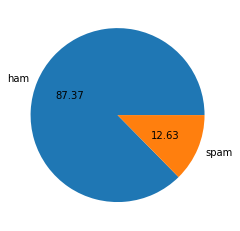

In [19]:
import matplotlib.pyplot as plt
plt.pie(df['Prediction'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()  ### for seeing only pie chart

In [20]:
# Data is imbalanced

In [21]:
import nltk  # Natural language Toll Kit

In [22]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [23]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [24]:
# number of characters
df['num_characters']=df['Text'].apply(len)

In [25]:
# number of words
df['Num_words']=df['Text'].apply(lambda x:len(nltk.word_tokenize(x))) #remove len fun and get words

In [26]:
# number of sentences
df['Num_sentences']=df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [27]:
df.head()

,Prediction,Text,num_characters,Num_words,Num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [28]:
df[['num_characters','Num_words','Num_sentences']].describe()

,num_characters,Num_words,Num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.978332,18.455407,1.961308
std,58.236795,13.322448,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
# Ham messages desribe
df [df['Prediction']==0] [['num_characters','Num_words','Num_sentences']].describe()

,num_characters,Num_words,Num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459699,17.123339,1.815545
std,56.358868,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
# Spam messages desribe
df [df['Prediction']==1] [['num_characters','Num_words','Num_sentences']].describe()

,num_characters,Num_words,Num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.969372
std,30.137753,7.008418,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [31]:
import seaborn as sns

<AxesSubplot:xlabel='Num_words', ylabel='Count'>

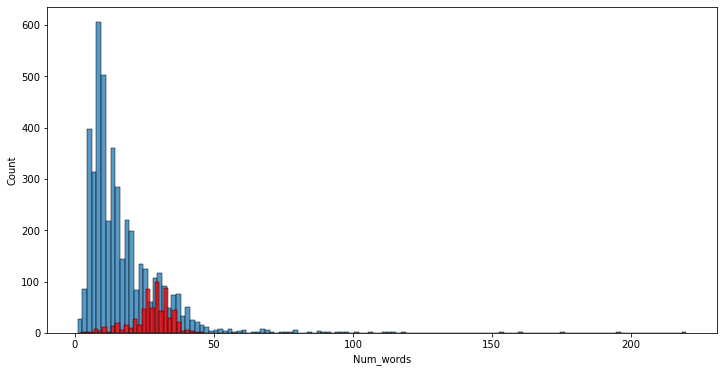

In [32]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Prediction'] == 0]['Num_words'])
sns.histplot(df[df['Prediction'] == 1]['Num_words'],color='red')

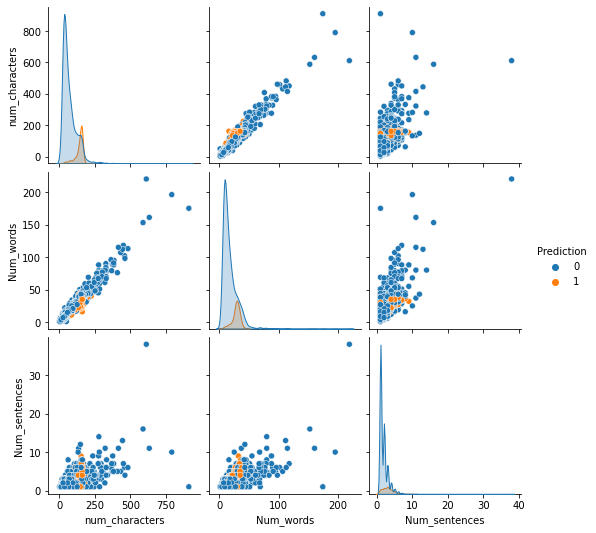

In [33]:
sns.pairplot(df,hue='Prediction')

<AxesSubplot:>

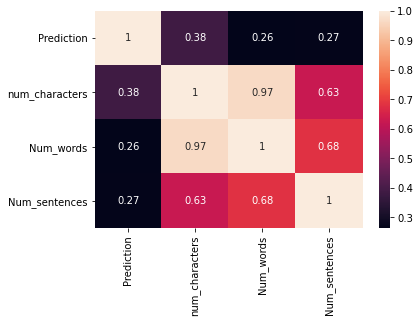

In [34]:
sns.heatmap(df.corr(),annot=True)

## 3.Data Preprocessing
#### i. Lower case
#### ii.Tokenization
#### iii. Removing special characters
#### iv. Removing stop words and punctuation
#### v.Stemming

In [35]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [36]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('dancing')

'danc'

In [37]:
nltk.download("stopwords")
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [38]:
# creating a function which will do all our preprocessing
def transform_text(Text):
    Text=Text.lower()
    Text=nltk.word_tokenize(Text)
    
    y=[]
    for i in Text:
        if i.isalnum():
            y.append(i)  
            
    Text=y[:]
    y.clear()
    
    for i in Text:
        if i not in stopwords.words('english')and i not in string.punctuation:
            y.append(i)
            
    Text=y[:]
    y.clear()
    
    for i in Text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [39]:

transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [40]:
df['Text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [41]:
df['Transformed_Text']=df['Text'].apply(transform_text)

In [42]:

df.head()

,Prediction,Text,num_characters,Num_words,Num_sentences,Transformed_Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [43]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [44]:
spam_wc=wc.generate(df[df['Prediction']==1]['Transformed_Text'].str.cat(sep=""))

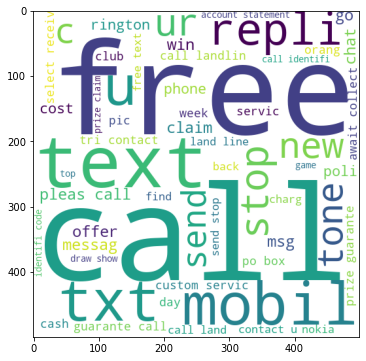

In [45]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [46]:
spam_corpus=[]
for msg in df[df['Prediction']==1]['Transformed_Text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [47]:
len(spam_corpus)

9939

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


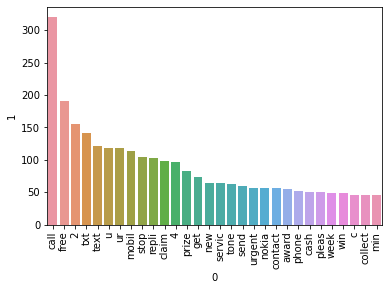

In [48]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [49]:
ham_wc=wc.generate(df[df['Prediction']==0]['Transformed_Text'].str.cat(sep=""))

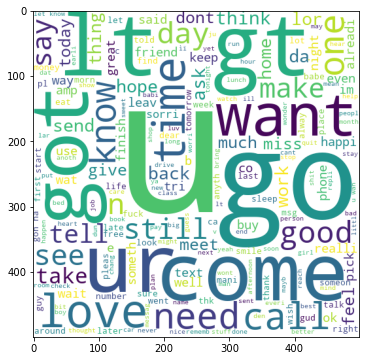

In [50]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [51]:
ham_corpus=[]
for msg in df[df['Prediction']==0]['Transformed_Text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [52]:
len(ham_corpus)

35402

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


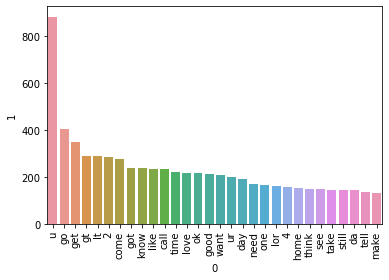

In [53]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# 4.Model Building

In [54]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf=TfidfVectorizer(max_features=2000)

In [55]:
X = tfidf.fit_transform(df['Transformed_Text']).toarray()

In [56]:
y=df['Prediction'].values

In [57]:
X.shape

(5169, 2000)

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=3)

In [60]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [61]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [62]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8365570599613152
[[749 145]
 [ 24 116]]
0.4444444444444444


In [63]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9729206963249516
[[894   0]
 [ 28 112]]
1.0


In [64]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9787234042553191
[[892   2]
 [ 20 120]]
0.9836065573770492


In [65]:
# tfidf --> mnb

In [66]:
# model improve
# 1.change the max_features parameter of tfidf

In [67]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))